In [34]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import scipy.stats as st

In [23]:
oil_data = "Resources/Historical_Oil_Data.csv"
gold_data = "Resources/Historical_Gold_Data.csv"

In [24]:
oil_data = pd.read_csv(oil_data)
gold_data = pd.read_csv(gold_data)

In [25]:
oil_gold_df = pd.merge(oil_data, gold_data, how="left", on="Date")

In [26]:
oil_gold_df.head()

,Date,Close/Last_x,Volume_x,Open_x,High_x,Low_x,Close/Last_y,Volume_y,Open_y,High_y,Low_y
0,02/03/2023,73.39,394327,75.92,78.00,73.10,1876.6,296669.0,1926.3,1932.4,1874.5
1,02/02/2023,75.88,318489,76.79,77.24,74.97,1930.8,242931.0,1967.1,1975.2,1925.6
2,02/01/2023,76.41,335699,79.06,79.73,76.05,1942.8,205037.0,1944.0,1970.8,1936.1
3,01/31/2023,78.87,292507,77.91,79.25,76.55,1945.3,189046.0,1938.6,1946.9,1915.5
4,01/30/2023,77.90,308615,80.04,80.49,77.66,1939.2,134362.0,1944.0,1950.1,1936.2


In [27]:
oil_gold_df = oil_gold_df.rename(columns={"Close/Last_x" : "oil_price",
                                "Volume_x" : "oil_volume",
                                "Close/Last_y" : "gold_price",
                                "Volume_y" : "gold_volume"})
oil_gold_df

,Date,oil_price,oil_volume,Open_x,High_x,Low_x,gold_price,gold_volume,Open_y,High_y,Low_y
0,02/03/2023,73.39,394327,75.92,78.00,73.10,1876.6,296669.0,1926.3,1932.4,1874.5
1,02/02/2023,75.88,318489,76.79,77.24,74.97,1930.8,242931.0,1967.1,1975.2,1925.6
2,02/01/2023,76.41,335699,79.06,79.73,76.05,1942.8,205037.0,1944.0,1970.8,1936.1
3,01/31/2023,78.87,292507,77.91,79.25,76.55,1945.3,189046.0,1938.6,1946.9,1915.5
4,01/30/2023,77.90,308615,80.04,80.49,77.66,1939.2,134362.0,1944.0,1950.1,1936.2
...,...,...,...,...,...,...,...,...,...,...,...
1254,02/12/2018,59.29,699404,59.12,60.83,59.10,1326.4,203283.0,1317.1,1330.0,1316.3
1255,02/09/2018,59.20,878528,60.43,60.77,58.07,1315.7,306980.0,1321.0,1325.0,1313.2
1256,02/08/2018,61.15,882388,61.70,62.09,60.27,1319.0,349123.0,1320.7,1324.5,1309.0
1257,02/07/2018,61.79,975908,63.92,64.18,61.25,1314.6,335680.0,1326.6,1334.8,1313.5


In [28]:
oil_gold_df.columns

Index(['Date', 'oil_price', 'oil_volume', 'Open_x', 'High_x', 'Low_x',
       'gold_price', 'gold_volume', 'Open_y', 'High_y', 'Low_y'],
      dtype='object')

In [29]:
clean_oil_gold_df = oil_gold_df[['Date', 'oil_price', 'oil_volume','gold_price', 'gold_volume']]
clean_oil_gold_df

,Date,oil_price,oil_volume,gold_price,gold_volume
0,02/03/2023,73.39,394327,1876.6,296669.0
1,02/02/2023,75.88,318489,1930.8,242931.0
2,02/01/2023,76.41,335699,1942.8,205037.0
3,01/31/2023,78.87,292507,1945.3,189046.0
4,01/30/2023,77.90,308615,1939.2,134362.0
...,...,...,...,...,...
1254,02/12/2018,59.29,699404,1326.4,203283.0
1255,02/09/2018,59.20,878528,1315.7,306980.0
1256,02/08/2018,61.15,882388,1319.0,349123.0
1257,02/07/2018,61.79,975908,1314.6,335680.0


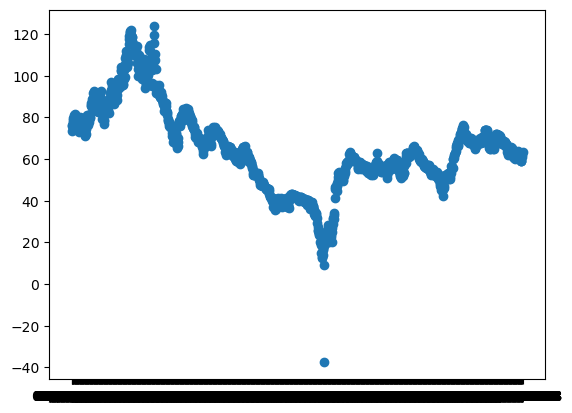

In [30]:
x_values = clean_oil_gold_df["Date"]
y_values = clean_oil_gold_df["oil_price"]

plt.scatter(x_values,y_values)
plt.show()

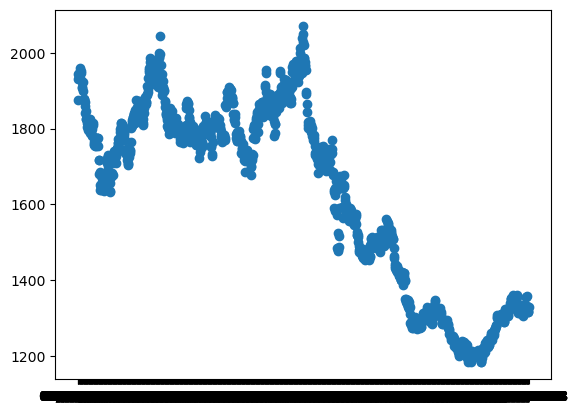

In [31]:
x_values = clean_oil_gold_df["Date"]
y_values = clean_oil_gold_df["gold_price"]

plt.scatter(x_values,y_values)
plt.show()

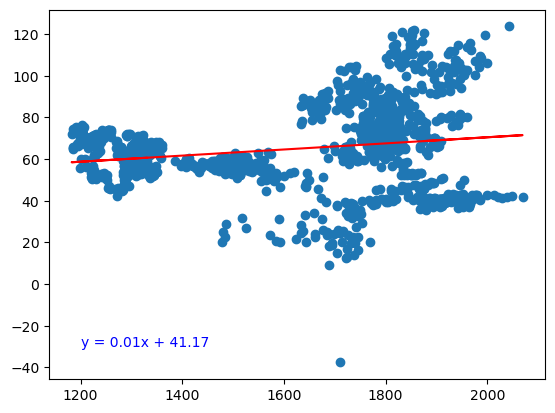

In [37]:
x_values = clean_oil_gold_df["gold_price"]
y_values = clean_oil_gold_df["oil_price"]
correlation = round(st.pearsonr(x_values,y_values)[0],2)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regression_values = x_values*slope +intercept
Regression_Line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,color = "red",alpha=1)
plt.annotate(Regression_Line,(1200,-30),fontsize=10,color="blue")
plt.show()